# HW4_Part 1 Statistic Distribution

In [2]:
# Stating all the packages here
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Borrowed the skeleton from:

Written by Federica B. Bianco @fedhere
 NYU CUSP PUI

 Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [3]:
#Setting a seed here so this can be reproducible
np.random.seed(12345)

## Choose which distributions to use

In [4]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## And which mean to give it; the mean will stay the same for all 5 distributions

In [5]:
mymean = 10

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [6]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


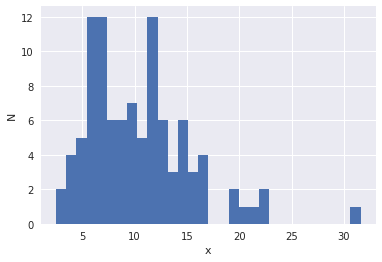

In [7]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Moved the numpy import to the very top. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)
# Import numpy as np

md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 10, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [8]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 10.37, standard deviation: 4.93


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [9]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


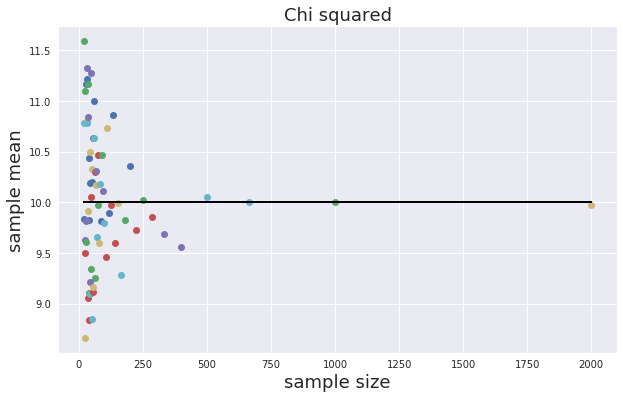

In [10]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: [describe what you see and how it relates to the law of large numbers]
According to the law of large numbers, we can see from the plot that the larger the sample size is, the closer its mean is to the expected mean. 

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


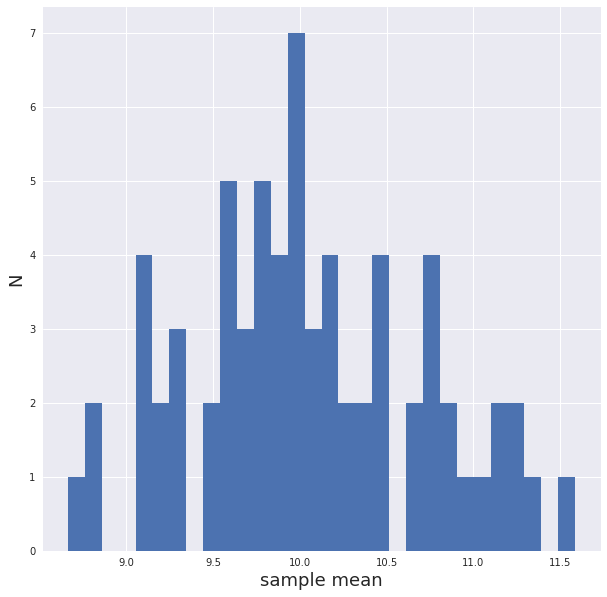

In [11]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: 
This histogram is not perfectly bell-shaped comparing to a normal distribution. It is a little bit right-skewed. Based on the Central Limit Theorem, this can be due to the size of the sample. 

# Do it for the Normal distribution


In [12]:
##your code here...
sizeND = (2000/np.array(range(1,101))).astype(int)
print ("Sample Size List: %s Shape: %s"%(sizeND, sizeND.shape))

Sample Size List: [2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] Shape: (100,)


Text(0.5,1,'4b.Normal Distribution Histogram')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


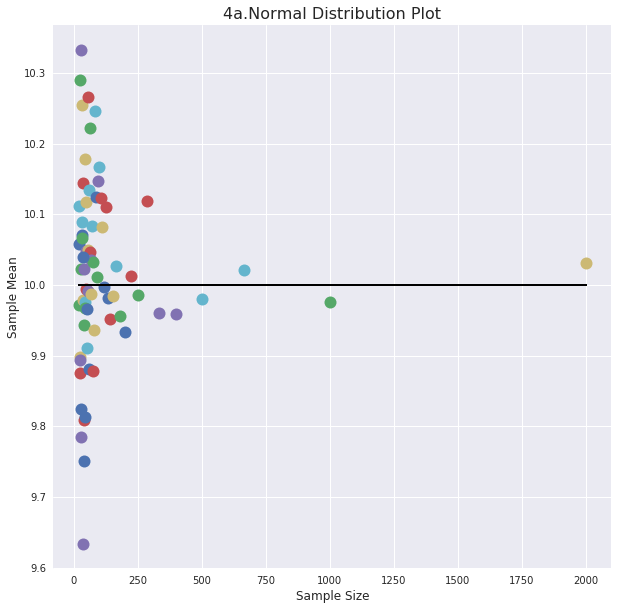

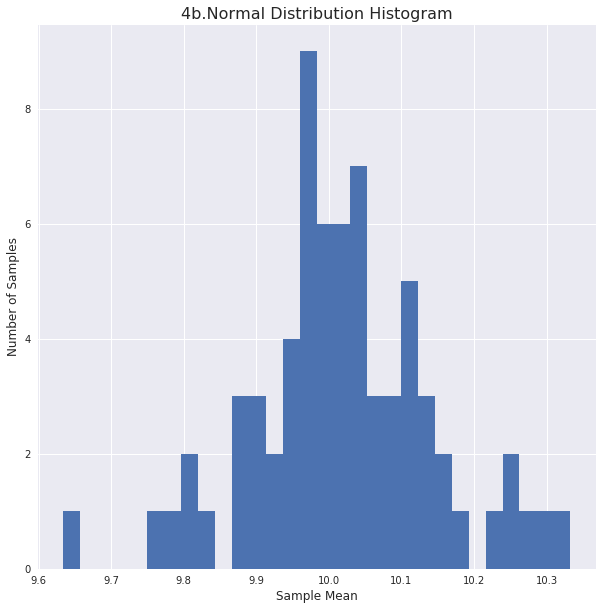

In [13]:
# Plot for Normal Distribution
DistributionND = ['gaus']

# Stating the mean, which is mymean at the beginning
NDmean = mymean

# Make an empty dictionary

ND = {}

#Define 'gaus'

ND['gaus'] = np.random.normal(NDmean, size = 100)

# Make a 'gaus' dictionary

ND['gaus'] ={}

# Using for loop for defining sample size

for a in sizeND:
    ND['gaus'][a] = np.random.normal(NDmean, size = a)

# Mean dictionary

ND['gaus']['meanND'] = {}

# Ensure the means are in string type
plotND = pl.figure(figsize=(10,10)).add_subplot(111)

for aa in ND['gaus']:
    if not type(aa) == str:
        ND['gaus']['meanND'][aa] = ND['gaus'][aa].mean()
        
        # Plotting Scatter
        # The x-axis will be sample size; y-axis will be the corresponding mean of each sample
        plotND.plot(aa, ND['gaus']['meanND'][aa], marker = 'o', markersize = 12 )
        plotND.set_xlabel('Sample Size', fontsize=12)
        plotND.set_ylabel('Sample Mean', fontsize=12)
        plotND.set_title('4a.Normal Distribution Plot', fontsize=16)
        
        # Plotting Mean line
        # The x-axis will be ranging from the min sample size to the max sample size; y-axis will be just mean
        plotND.plot([min(sizeND), max(sizeND)], [NDmean, NDmean], "k")

# Plotting histogram
NDmeans = list(ND['gaus']['meanND'].values())

pl.figure(figsize=(10, 10))
pl.hist(NDmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 12)
pl.ylabel('Number of Samples', fontsize = 12)       
pl.title('4b.Normal Distribution Histogram', fontsize = 16)
        



## Figure 4a:
According to the law of large numbers, we can see from the this plot, the larger the sample size is, the closer it's sample mean is to the expected mean. As we can see, the large-sized sample (size = 2000, 1000, 666, 500 etc) are all not too far away from the mean line. 

## Figure 4b:
The histogram is not perfectly bell-shaped which based on Central Limit Theorem, can be due to the limit of sample sizes. However, it is close to normal distribution as the mode is very close to the expected mean (10). 

# Do it for the Poisson distribution

In [14]:
##your code here...
sizePD=(np.linspace(4,2000,100)).astype(int)
print (sizePD, sizePD.shape)

[   4   24   44   64   84  104  124  145  165  185  205  225  245  266  286
  306  326  346  366  387  407  427  447  467  487  508  528  548  568  588
  608  629  649  669  689  709  729  749  770  790  810  830  850  870  891
  911  931  951  971  991 1012 1032 1052 1072 1092 1112 1133 1153 1173 1193
 1213 1233 1254 1274 1294 1314 1334 1354 1374 1395 1415 1435 1455 1475 1495
 1516 1536 1556 1576 1596 1616 1637 1657 1677 1697 1717 1737 1758 1778 1798
 1818 1838 1858 1879 1899 1919 1939 1959 1979 2000] (100,)


Text(0.5,1,'5b.Poisson Distribution Histogram')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


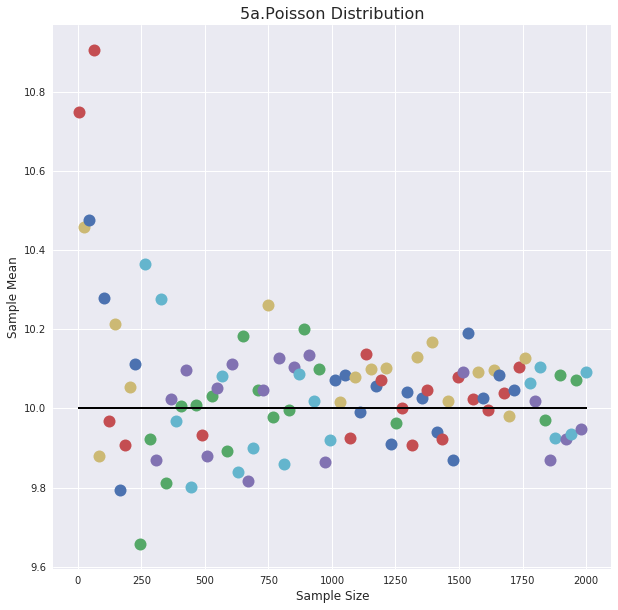

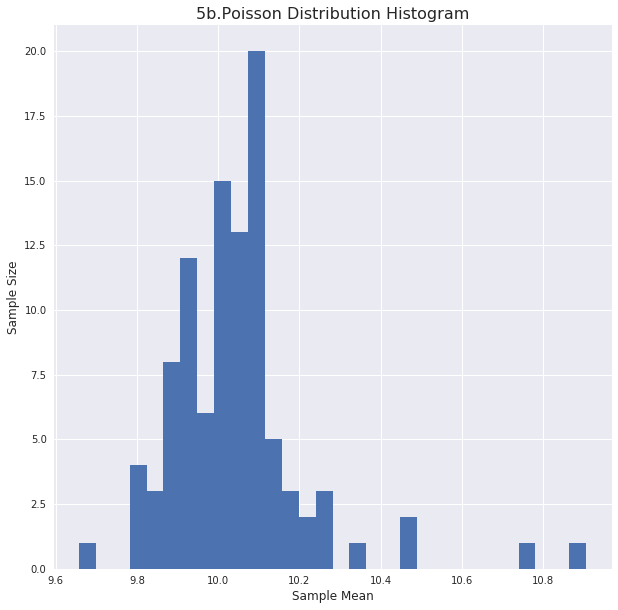

In [15]:
# Plot the poisson distribution 
distributionPD=['pois']

# Define the mean
PDmean = mymean

# Make an Open Dictionary
PD = {}

# Define 'pois'

PD['pois'] = np.random.poisson(PDmean, size = 100)

# Mamke the ['pois'] Dictionary

PD['pois'] = {}

# For loop for defining the sample size

for b in sizePD:
    PD['pois'][b] = np.random.poisson(PDmean, size = b)
    
# The mean dictionary

PD['pois']['meanPD'] = {}

# Defining the mean and start plotting 

PDplot = pl.figure(figsize=(10,10)).add_subplot(111)

for bb in PD['pois']:
    if not type(bb)==str:
        PD['pois']['meanPD'][bb] = PD['pois'][bb].mean()
# The x-axis will be sample size; y-axis will be the corresponding mean of each sample
        PDplot.plot(bb, PD['pois']['meanPD'][bb], 'o', markersize = 12)
        PDplot.set_xlabel("Sample Size", fontsize=12)
        PDplot.set_ylabel("Sample Mean", fontsize=12)
        PDplot.set_title("5a.Poisson Distribution", fontsize=16)
 # Plotting Mean line
# The x-axis will be ranging from the min sample size to the max sample size; y-axis will be just mean
        PDplot.plot([min(sizePD),max(sizePD)], [PDmean, PDmean], "k")
    
# Plotting histogram
PDmeans = list(PD['pois']['meanPD'].values())

pl.figure(figsize=(10, 10))
pl.hist(PDmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 12)
pl.ylabel('Sample Size', fontsize = 12)
pl.title('5b.Poisson Distribution Histogram', fontsize = 16)

## Figure 5a:
According to the law of large numbers, the larger the sample size is, the closer it's sample mean is to the expected mean. However, in this plot, we can see, above a certain sample size (size = 250), the sample means are all not too far away from the mean line. 


## Figure 5b:
The histogram is not perfectly bell-shaped which based on Central Limit Theorem. The mode is very close to the expected mean (10). 

# Do it for the Binomial distribution

In [16]:
##your code here...
sizeBD=(np.random.randint(10,2000, size=100)).astype(int)
print (sizeBD, sizeBD.shape)

[ 318 1159 1666  708  557  802 1792  810 1589 1804 1921  169  610 1082  728
 1292 1421  356   83   34 1675 1285 1011  908 1608 1102  202   95 1456 1405
  763 1307 1654 1978 1385  407  837 1228  105 1774 1542  301   49 1345  939
  631 1272  242 1102 1505  420 1038  208 1704 1504   70  825  147  125  438
 1154  599 1427  376  343  432  650   75 1118 1504  660  272 1840 1646 1975
  649 1130  659 1682  329 1958 1937   18 1343   47  783 1413 1884 1163  250
  516  357 1731 1504 1798  815 1205  294  180 1690] (100,)


Text(0.5,1,'6b.Binomial Distribution Histogram')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


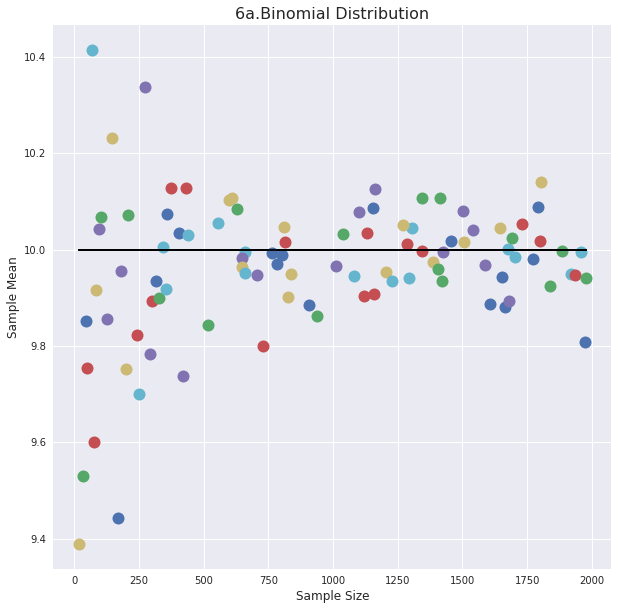

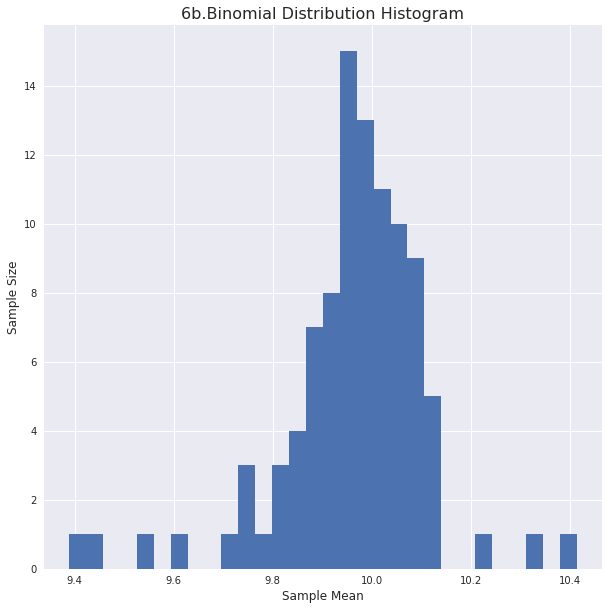

In [17]:
# Plot the binomial distribution 
distributionBD=['bino']

# Define the mean
BDmean = mymean

# Make an Open Dictionary
BD = {}

# Define 'bino'; note: np.random.binomial(testing time, probability, size); testing time * probability = mean

BD['bino'] = np.random.binomial(20, 0.5, size = 100)

# Mamke the ['bino'] Dictionary

BD['bino'] = {}

# For loop for defining the sample size

for c in sizeBD:
    BD['bino'][c] = np.random.binomial(100, 0.1, size = c)
    
# The mean dictionary

BD['bino']['meanBD'] = {}

# Defining the mean and start plotting 

BDplot = pl.figure(figsize=(10,10)).add_subplot(111)

for cc in BD['bino']:
    if not type(cc)==str:
        BD['bino']['meanBD'][cc] = BD['bino'][cc].mean()
# The x-axis will be sample size; y-axis will be the corresponding mean of each sample
        BDplot.plot(cc, BD['bino']['meanBD'][cc], 'o', markersize = 12)
        BDplot.set_xlabel("Sample Size", fontsize=12)
        BDplot.set_ylabel("Sample Mean", fontsize=12)
        BDplot.set_title("6a.Binomial Distribution", fontsize=16)
 # Plotting Mean line
# The x-axis will be ranging from the min sample size to the max sample size; y-axis will be just mean
        BDplot.plot([min(sizeBD),max(sizeBD)], [BDmean, BDmean], "k")
    
# Plotting histogram
BDmeans = list(BD['bino']['meanBD'].values())

pl.figure(figsize=(10, 10))
pl.hist(BDmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 12)
pl.ylabel('Sample Size', fontsize = 12)       
pl.title('6b.Binomial Distribution Histogram', fontsize = 16)

## Figure 6a:
According to the law of large numbers, the larger the sample size is, the closer it's sample mean is to the expected mean. In this plot, when sample size is above 500, the sample means are all not too far away from the mean line. However, the sample means do get more concentrate to the mean line when size size is growing. 


## Figure 6b:
The histogram is not perfectly bell-shaped which based on Central Limit Theorem. The mode of the sample mean is very close to the expected mean (10). The histogram is a bit left-skewed (longer tail on the left side). 

# Do it for another distribution - Gamma distribution

In [18]:
##your code here...
sizeGD=(2000/np.array(range(1,101))).astype(int)
print (sizeGD, sizeGD.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


Text(0.5,1,'7b.Gamma Distribution Histogram')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


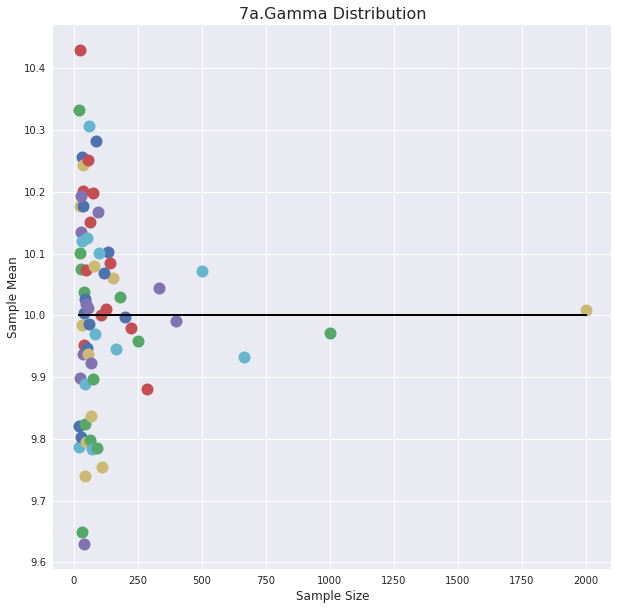

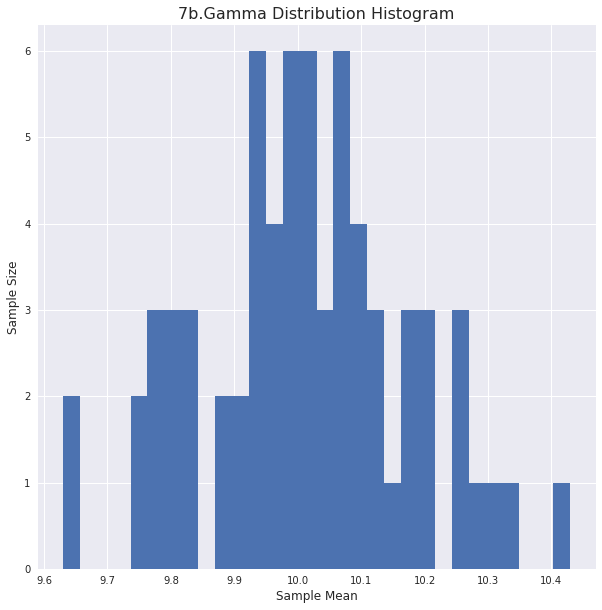

In [19]:
# Plot the  distribution 
distributionGD=['gamma']

# Define the mean
GDmean = mymean

# Make an Open Dictionary
GD = {}

# Define 'weib'
GD['gamma'] = np.random.gamma(100,0.1, size = 100)

# Mamke the ['bino'] Dictionary

GD['gamma'] = {}

# For loop for defining the sample size

for d in sizeGD:
    GD['gamma'][d] = np.random.gamma(100,0.1, size = d)
    
# The mean dictionary

    GD['gamma']['meanGD'] = {}
# Defining the mean and start plotting 

GDplot = pl.figure(figsize=(10,10)).add_subplot(111)

for dd in GD['gamma']:
    if not type(dd)==str:
        GD['gamma']['meanGD'][dd] = GD['gamma'][dd].mean()
# The x-axis will be sample size; y-axis will be the corresponding mean of each sample
        GDplot.plot(dd, GD['gamma']['meanGD'][dd], 'o', markersize = 12)
        GDplot.set_xlabel("Sample Size", fontsize=12)
        GDplot.set_ylabel("Sample Mean", fontsize=12)
        GDplot.set_title("7a.Gamma Distribution", fontsize=16)
        GDplot.plot([min(sizeGD), max(sizeGD)], [GDmean, GDmean], 'k')
    
# Plotting histogram
GDmeans = list(GD['gamma']['meanGD'].values())

pl.figure(figsize=(10, 10))
pl.hist(GDmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 12)
pl.ylabel('Sample Size', fontsize = 12)   
pl.title("7b.Gamma Distribution Histogram", fontsize = 16)

## Figure 7a:
According to the law of large numbers, the gamma plot shows that the larger the sample size is, the closer it's sample mean is to the expected mean. When sample size is larger than 250, the closer and less distributed away from the expected mean. 


## Figure 7b:
The histogram is not perfectly bell-shaped which based on Central Limit Theorem. There are more than 1 mode happening in this histogram. 

# Histogram for All Distritbutions

Text(0.5,1,'8.All Means Distribution Histogram')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


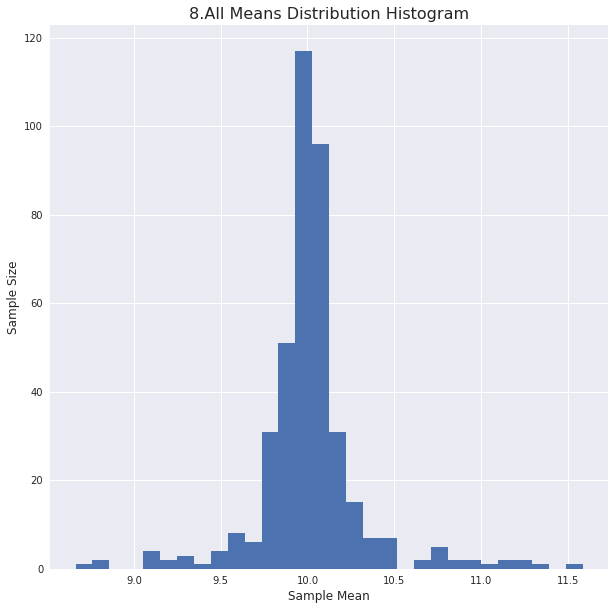

In [20]:
Popmeans = allmeans + NDmeans + PDmeans + BDmeans + GDmeans
#print(Popmeans)

pl.figure(figsize=(10, 10))
pl.hist(Popmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 12)
pl.ylabel('Sample Size', fontsize = 12)   
pl.title("8.All Means Distribution Histogram", fontsize = 16)

## Figure 8:
Once all the samples are combined together, the shape of the histogram is getting closer to normal distribution as more variables are added. Even though may samples are generated from non-Gaussian distribution sets, when putting together, the shape is close to bell-curved and relatively more symmetrical. 

# Extra Credit - FIT Gaussian into each distributions

### Chi-Square Histogram with Gaussian line

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


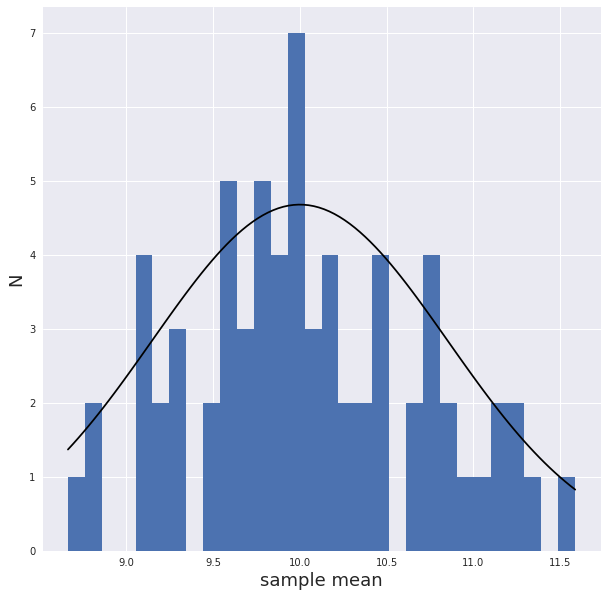

In [21]:
from scipy.stats import norm
allmeans = list(md['chisq']['means'].values())
#print(allmeans)

#l = len(allmeans)
#for i in range (allmeans):
 #   x = allmeans[i]
  #  y = norm.pdf(allmeans[i])
   # pl.plot(x, y, 'g-')
    #print (i)
# print (allmeans)
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Number of Samples', fontsize = 18)
pl.title('Chi-Square Mean Distribution')

#Adding the Gaussian line
    # Get a normalized mean distribution for all the sample means(allmeans)
    # In the x-axis, it will be np.linspace(start, stop, sample size)
        # Reference: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linspace.html
        # Reference: http://firsttimeprogrammer.blogspot.com/2014/07/how-to-fit-data-to-normal-distribution.html

x = np.linspace(min(allmeans), max(allmeans), 100)

    # Getting a normalized standard deviation
        # Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html
std = sqrt(mean(abs(x - x.mean())**2))
    # In the y-axis, it will be normalized probability of x, keeping the population mean the same. 
    # I used *10 as the return of y would be between 0 to 1 (probability ratio) so times 10 would bring to a regular number. 
        # Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
y = norm.pdf(x, mymean, std) * 10
pl.plot(x, y, 'k')
pl.show()

# Figure 9: 
This histogram of chi-square distribution has been added a normal distribution line. This historgram is not symmetrical and not perfectly bell-shaped. 

In [22]:
#x = np.random.rand(100)
#y = norm.pdf(x, 10, 1)
#pl.plot(x, y, 'o')

### All Distribution Histogram with Gaussian line

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


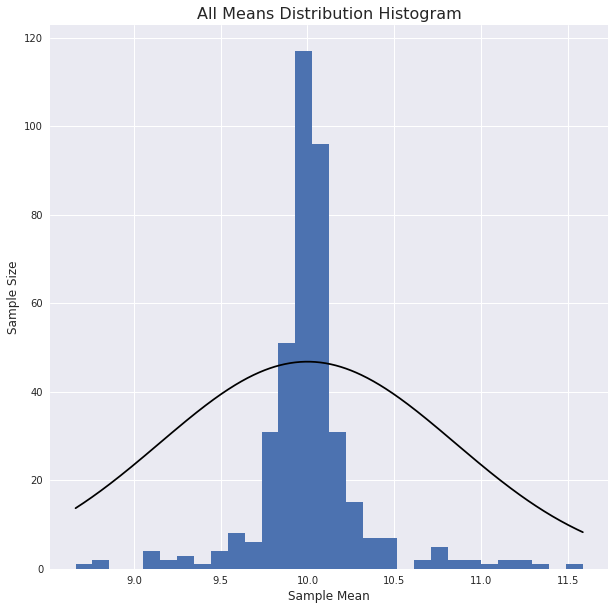

In [26]:
Popmeans = allmeans + NDmeans + PDmeans + BDmeans + GDmeans

pl.figure(figsize=(10, 10))
pl.hist(Popmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 12)
pl.ylabel('Sample Size', fontsize = 12)   
pl.title("All Means Distribution Histogram", fontsize = 16)

#Adding the Gaussian line
    # Get a normalized mean distribution for all the sample means(allmeans)
    # In the x-axis, it will be np.linspace(start, stop, sample size)
        # Reference: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linspace.html
        # Reference: http://firsttimeprogrammer.blogspot.com/2014/07/how-to-fit-data-to-normal-distribution.html

xA = np.linspace(min(Popmeans), max(Popmeans), 500)

    # Getting a normalized standard deviation
        # Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html
stdA = sqrt(mean(abs(xA - xA.mean())**2))
    # In the y-axis, it will be normalized probability of x, keeping the population mean the same. 
    # I used *10 as the return of y would be between 0 to 1 (probability ratio) so times 10 would bring to a regular number. 
        # Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
yA = norm.pdf(xA, mymean, std) * 100
pl.plot(xA, yA, 'k')
pl.show()

## Figure 10: 
After add the Gaussian line as a reference, we can see that the shape is similar to the bell-curved Gaussian line. 